### ResNet-50 implmentation of facial expression recogniser

In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
from fastai.vision import *
from fastai.metrics import error_rate

In [22]:
bs = 16
path = '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/'; path

'/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/'

In [23]:
from pathlib import Path
str_path = path
path = Path(str_path)

In [24]:
path.ls()

[PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/valid'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/__MACOSX'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/train'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/Archive.zip'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/ext_data/models')]

In [25]:
path_img = path/'ext_data'

In [26]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=299,bs=bs).normalize(imagenet_stats)

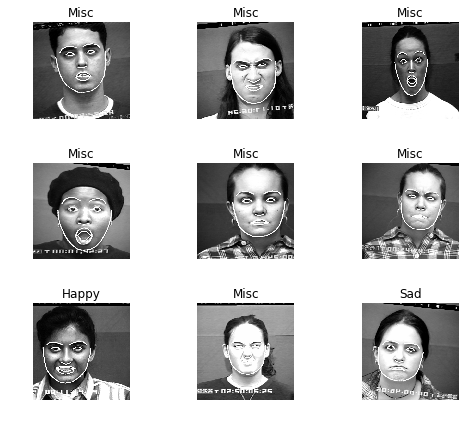

In [27]:
data.show_batch(rows=3, figsize=(7,6))

In [28]:
print(data.classes)

['Happy', 'Misc', 'Sad']


In [29]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.307536,0.971538,0.359649
2,1.038316,1.017141,0.359649
3,0.895688,0.778325,0.315789
4,0.756083,0.764028,0.342105


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


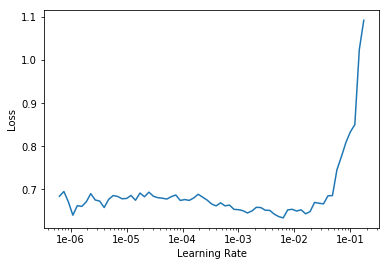

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.920272,1.255908,0.368421
2,0.841101,1.752352,0.429825
3,0.835806,1.053732,0.280702
4,0.658260,0.550230,0.228070
5,0.591630,0.526032,0.201754


In [33]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

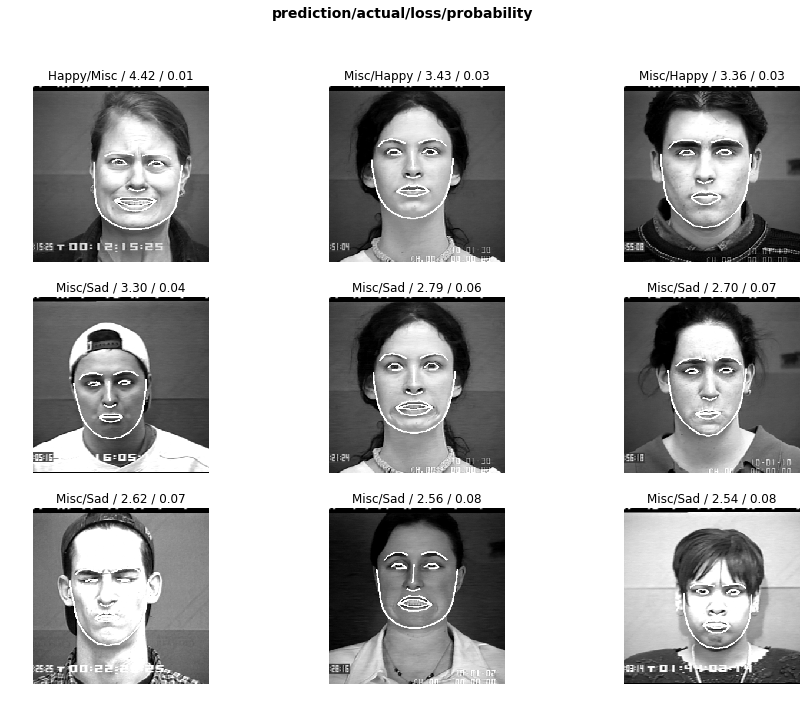

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

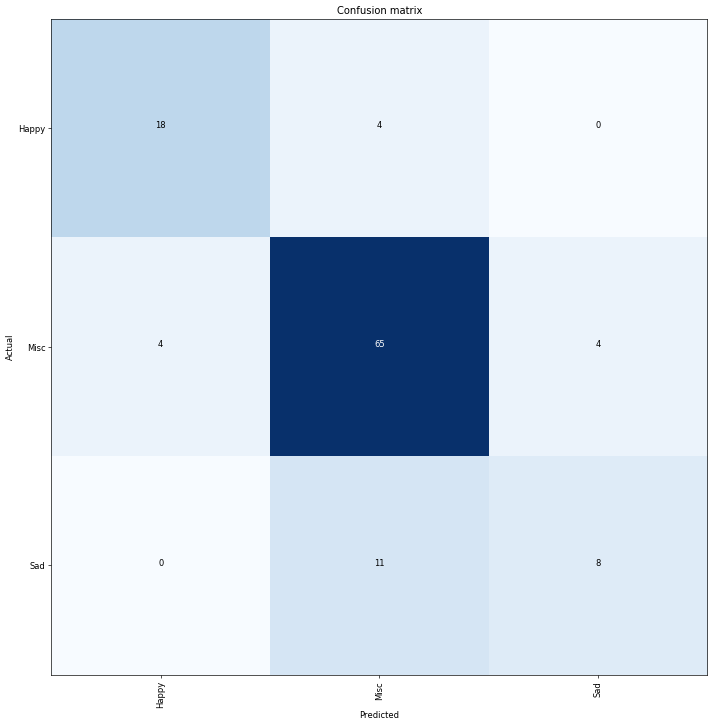

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)